# FYS-STK4155 Project #1 - Regression Analysis

Evaluation of Project number: 1 <br />
Name: Lennart Lehmann (ERASMUS Student)

## Abstract 

This work is used to parameterize digital terrain data (of a Norwegian scenerey) by benchmarking three different regression algorithms: <br /> 
**1.) Linear Regression / Ordinary Least Squares (OLS)** <br />
**2.) Ridge Regression** <br />
**3.) Lasso Regression** <br />
In order to judge the bias and variance of the different models, Cross Validation is used as a technique of resampling. <br /> 

**YOUR FINDING GOES IN HERE **

Displaying the bias-variance tradeoff reveals that we our model is mostly dominated in the bias area and the variance basically no effect on the mean error.

## 1.) Introduction

Linear regression methods are fundamental in the field of statistical modelling. In the simplest
variant of regression analysis, modelling a response dependent on some predictor variables,
a linear approach is assumed for the relasionship between response and predictors. <br />
The approach is linear in the sense of a linear combination of (possible non-linear) functions of a single
predictor. This linearity allows the matrix-vector equations resulting from minimizing the
error between the observed data (targets) and the predicted model data to be solved, which
is the main advantage of the method (and the main reason why linear regression is extensively
used today). <br />
In the modern society, data is ubiquitous and abundant. However, with an ever increasing volume of data availability, drawing sensible conclusions about the relasionships between variables is non-trivial. <br />
Suppose having a complete set of statistics about every school district in a specific county: The grade point average (GPA) of every single student, the size and composition (in terms of nationalities, gender, height, weight, etc.) of every class, a full description of the teaching schedule of every teacher, their personal data, educational history and work history. Such a data set might be already available, but drawing conclusions from it is not easy. For instance if you want to know whether students achieve better overall grades when you increase the number of teachers per student. <br />
Or a more complex question what is the most efficient way to increase the overall grades of students? <br />
Such questions apply to relationships between data of varying types are possible to answer
using regression analysis, and bound on the statistical significance of the answers are possible
to find. In the following, we will consider a much simpler toy problem as a simple introduction
to the topic: Fitting a real valued function of two real variables. We will start out by considering
the theory behind linear regression.

The goal of regression analysis is to extract relationship between  $y$  and  $x$  to be able to infer causal dependencies, approximations, functional relationships, making predictions or model fits and many other things.


## 2.) Formalism

Within the scope of this project the three aforementioned regression methods has been used to accomplish the goal of parameterizing terrain data.
However, before going straight into the Terrain Data, we will first explore each method individually with some 'toy data'.
Before the Implementation starts it is important to understand the theory behind the algorithms. So let's first tackle the beautiful mathematical foundations of these theories and then implement them accordingly.
<br /> 

### 2.1) Ordinary Least Squares (OLS)

Considering a case with $p$ predictors of $n$ measured samples. Additionally, we have the target $y$, a vector of size *n*: $\boldsymbol{y} =[y_1, y_2,\dots, y_{n}]^T$. The predictors along with the samples are organized in a matrix $\boldsymbol{X}$, called *design matrix*, with the shape $ \boldsymbol{X} \in {\rm I\!R^{n\times p}}$, where the predictors $p$ refer to a column and the samples $n$ represent the rows.

So the design Matrix $\boldsymbol{X}$ will have the shape of $ \boldsymbol{X} \in {\rm I\!R^{n\times p}}$ and looks like follows: <br /> 

$$
\mathbf{X} =
      \begin{bmatrix} x_{1,1} & x_{1,2} & ... & x_{1,p} \\
                                 x_{2,1} & x_{2,2} & ... & x_{2,p} \\
                                   \vdots & \ddots & \ddots & \vdots \\
                                  x_{n,1} & x_{n,2} & ... & x_{n,p}
             \end{bmatrix}\qquad 
$$


In regression problems we want to construct a linear function: <br /> 

$$
\boldsymbol{y} = \boldsymbol{X}\beta + \varepsilon \tag{1}
$$

where $\varepsilon$ denotes a zero mean normal distributed noise added to our linear model to account for some deviations.
With $ \varepsilon \sim \cal{N}(\mu = 0,\sigma^2)$ <br />
$\beta$ is an unknown vector that counts to estimate in the regression problem. With $\beta\in {\mathbb{R}}^{p\times 1}$ <br /> 

The goal is the minimize the objective function (also known as Cost function) of linear regression to end up in the best possible linear fit of the model through the given datapoints.  <br />

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right)\right\}. \tag{2}
$$

This equation (2) is also called the *Mean Squared Error (MSE)*.
Since we are interested in finding the parameters $\beta$ we have to minimize the cost function. Meaning we need to take the derivative of $C(\beta)$ with respect to $\beta$. Hence, we want to solve the following optimization problem: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}. \tag{3}
$$

rewriting this in the matrix-vector form yields: 

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right). = \boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} \tag{4}
$$

Now, if the matrix $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we end up in the solution for our parameter $\beta$: <br />

$$
\boldsymbol{\beta}^{\mathrm{OLS}} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}. \tag{5}
$$

By optimizing our Cost function (2), we get the equation for our parameter $\beta$ (5), which is used to further optimally fit a linear line through our given dataset.

*EXPLAIN the problems with OLS --> High Dimensional data, need to have a inversible matrix X, outliers, ...*


### 2.2) Ridge Regression

Ridge Regression is similiar to the Ordinary Least Squares (OLS) from above, by just adding a regularization parameter $\lambda$ to our Cost function. Considering the Minimization problem of the objective function from Linear Regression (3), the Mean Squared Error (MSE), we could also express it as follows: <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2, \tag{6}
$$

We can further simplify it with the expression of the norm-2 vector (a.k.a $L^2$ regularization) that is given by: <br />

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}. \tag{7}
$$

Again, by minimizing the above equation with respect to the parameters $\beta$ yields an analytical expression for the
parameters $\beta$. As mentioned earlier in Ridge regression a new parameter $\lambda$ is introduced to the cost function prevent our model from overfitting by penalizing large weights [3]. This results in a penalized optimization problem that looks as follows: < br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2 \tag{8}
$$

This leads to the Objective function for Ridge Regression: <br />

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2 \tag{9}
$$

Again, as in (4) by taking the derivative of $C(\boldsymbol{X},\boldsymbol{\beta})$ with respect to $\boldsymbol{\beta}$ results in the equation for $\boldsymbol{\beta}$: <br />

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y} \tag{10}
$$

with $\boldsymbol{I}$ being the idendity matrix. Due to the modified matrix inversion, Ridge regression does not suffer from singularity problems, for finite values of $\lambda$ [6].

Comparing the equations of OLS and Ridge Regression, one can see that Ridge is nothing but the standard OLS with a modified, regularizing diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$.


### 2.3) Lasso Regression

Lasso Regression is very similiar to Ridge Regression, **but** instead of taking the $L^2$ regularization, Lasso utilizes the $L^1$ regularization, which is defined as follows: <br />

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert. \tag{11}
$$

Hence, the LASSO optimization equation is just slightly different to the Ridge Regression (8): <br />

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1 \tag{12}
$$

Lastly, in **Least Absolute Shrinkage and Selection Operator** (LASSO) the cost function looks like: <br />

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1 \tag{13}
$$

Looking at all the Regression methods, one can see that both Ridge and LASSO are slight tweaks from the OLS method to combat Ordinary Least Squares' weaknesses and make the Regression problem more robust.

### 2.4) Resampling methods

Resampling methods are crucial in Machine learning, especially when dealing with **limited amount of data**. <br />
The main idea behind resampling is to repeatedly draw (different) samples from the dataset and split those accrodingly into test  and training data. Every single run a model gets fitted on the training data set and eventually evaluated with its test dataset. The final output will then be the average of the testing accuracy of all performed runs. <br />
However, this nice feature comes to the cost of computation. Since models have to be fitted every single time and evaluated on different subsets of the data, resampling methods are computationally expensive. <br />
The most popular among the resampling techniques are Cross-Validation as well as the Bootstrap, which will be further explained below. <br />


#### 2.4.1) Cross- Validation

Cross-Validation is used to split the entire data into 2 groups, calles *training* and *test data*. A model's performance is always evaluated on the *test data* by calculating the accuracy metrics on this data set with the given targets and model's predictions. <br />
By splitting the entire data into *k-even subsets* (where $k \in [1, 2, ..., n]$), we obtain a training dataset of size *k-1* subsets and one subset of test data. This technique is calles *k-fold Cross Validation*. <br /> 
Afterwards each single subset will be once used as test data which will in turn lead to *k* runs of the exact same model (same hyperparameters) but different training and test data for each run. Hence, each run returns a test error on its underlying test data. By averaging the test errors by the *k* number of runs, we obtain the final model accuracy.<br /> 
Thus, *Cross-Validation* is used to asses the performance of a given model. <br />

#### 2.4.2) The Bootstrap

*The Bootstrap* is a statistical technique for estimating quantities about a population by taking averages over estimates from several smaller data samples. <br />
Those samples are constructed by drawing random observations from a large data sample (usually the training set in Machine Learning) with replacement. Notice that it is possible to have the exact same observation multiple times in the selected subset, since the Bootstrap draws random samples *WITH* replacement. <br />
By taking repeatedly small samples of a population, the bootstrap resampling method calculates the statistics (Mean Squared Error (MSE), bias, variance) of those samples. This will result in an indication of the appropriate order of model complexity. <br />

### 2.5) Terrain Data

We were given a 2 files each containing an area of Norway with its land surface topology and a resolution of roughly 30m (1 arc-second).  <br> 
The data was retrieved from U.S. Department of the Interior U.S. Geological Survey's (USGS) [EarthExplorer](https:
//earthexplorer.usgs.gov/) [1] website. <br />
USGS stores data from the Shuttle Radar Topography Mission (SRTM), which maps the earth's land surface topology with the aforementioned resolution. <br />
The data is stored as a *.tif* file, which is common for tagged image files such as topology data
This project will use SRTM data taken from the EarthExplorer website as the foundation of the terrain parametrization. <br />
The images have a size of *3801 x 1801 pixels (height x width)* each. Thus generating a matrix of shape: $ \boldsymbol{X} \in {\rm I\!R^{3801\times 1801}}$ if we would not modify the input.
The specific terrain data we will use in the present project is a region close to Stavanger, Norway and the other taken from the Møsvatn Austfjell also located in Norway. A visual representation of both terrains is shown in Fig. 1 or Fig. 2 (pretty much at the end of this notebook), respectively. <br />



### 2.6) Franke's Function

The [Franke function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf) was originally developed to test and rate different surface interpolation techniques. Hence, the Franke function is eminently suitable to plot our terrain data.

The Franke function, which is a weighted sum of four exponentials reads as follows: <br />

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*} \tag{14}
$$

The function will be defined for $x,y\in [0,1]$.



## 3.) Code and Implementation
*Readability of Code, Implementation and testing and discussion of Benchmarks*

In [1]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from random import random, seed
import matplotlib.pyplot as plt
from imageio import imread
from matplotlib import cm
from PIL import Image
import numpy as np
import os
%matplotlib inline

In [2]:
# set up a plot directory
if os.path.isdir(os.path.join(os.getcwd(), 'plots')): 
    plot_dir = os.path.join(os.getcwd(), 'plots')
else :
    os.mkdir(os.path.join(os.getcwd(), 'plots'))
    plot_dir = os.path.join(os.getcwd(), 'plots')

In [3]:
# Franke Function definition
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

### OLS on Franke function

As a warm up, the following will fit a polynom of the fifth degree to data generated by the Franke function. <br /> 

For the sake of simplicity and beauty of this exceptionally awesome Python notebook, I will mostly call the Class methods in the cells below. In order to have this notebook rather uncluttered, you can find the proper Code as Python file in the [root](https://github.com/lenlehm/Regression-and-Resampling) of this directory. <br />. 

In order to have this notebook rather uncluttered of Code, since it is often hard to decipher Code, I included my own class *RegressionMethods*, which is also available in the 
There are the usual Regression methods implemented (*Ordinary Least Squares (OLS), Ridge, Lasso, and my own implementation of the first two*) as well as the construction of the design matrix $\boldsymbol{X}$ along with the Franke Function. <br /> 
The first example below depicts the *OLS* with *n* datapoints, where we fit a polynomial of the *polynom_degree* without noise: <br /> 

$$
\boldsymbol{y} = f(\boldsymbol{x}) \tag{15}
$$

Secondly, we also want to look at noisy data: <br />
$$
\boldsymbol{y} = f(\boldsymbol{x}) + \boldsymbol{\varepsilon} \tag{16}
$$

Where the noise ($\boldsymbol{\varepsilon}$) is being sampled from a normal distribution with mean $\mu$ and standard deviation $\sigma^2$. (the following example uses zero mean, $\mu$ = 0, and $\sigma^2 = 0.4)$.<br />  
$$
\boldsymbol{\varepsilon} \sim \cal{N}(\mu,\sigma^2)
$$

In [4]:
# This cell shows my OLS implementation with and without noise vs. SKLearn's version
from RegressionMethods import RegressionMethods as lehmannsch_enchantment
from RegressionMethods import Scores as lehmann_approved

n_data_points  = 150
polynom_degree = 5
noise_factor   = 5

# the class takes only the function as obligatory parameter, all the others are optional
regresser = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, degree=polynom_degree, noise_factor=noise_factor)

# first the version without noise
regresser.Lehmann_OLS_fit(regresser.X, regresser.y, split=False, noise=False)
regresser.Lehmann_Predictions('OLS', regresser.designMatrix, split=False)

# generate a Score class for MSE and R2
scoring = lehmann_approved(regresser.targets, regresser.lehmann_prediction)
print("My MSE: {}".format(scoring.MeanSquaredError()))
print("My R2 : {}".format(scoring.R2_Score()))

# and now with noise
regresser.Lehmann_OLS_fit(regresser.X, regresser.y, split=False, noise=True)
regresser.Lehmann_Predictions('OLS', regresser.designMatrix, split=False)
scoring = lehmann_approved(regresser.targets, regresser.lehmann_prediction)
print("\nMy Noisy MSE: {}".format(scoring.MeanSquaredError()))
print("My Noisy R2 : {}\n".format(scoring.R2_Score()))

## And now let's take a look at SKLearns performance without noise
regresser.Sklearn_OLS(regresser.X, regresser.y)
scoring = lehmann_approved(regresser.targets, regresser.sklearn_prediction)
print("SKLearn MSE: {}".format(scoring.MeanSquaredError()))
print("SKLearn R2 : {}\n".format(scoring.R2_Score()))

My MSE: 0.0011964073060540224
My R2 : 0.9246477559588329

My Noisy MSE: 0.004548630903499023
My Noisy R2 : 0.7135176756617225

SKLearn MSE: 0.0011964073060540116
SKLearn R2 : 0.9246477559588335



Now, we want to leverage the power of resampling methods. Therefore the sklearn library has a handy method called *train_test_split* to generate two datasets. This is a common Machine Learning approach to split the data into *Training* and *Test* data (often also a third set called *Validation* dataset). [2] <br />
The *Training dataset* is solely used for training purposes to find optimal values for the parameters.  On the other hand the *Test dataset* evaluates the trained model based on a defined score metric such as Mean Squared Error or Accuracy. <br />
The following code uses a split of *20%*, thus ending up of a *Training dataset*, which comprises *80%* of the entire dataset and accordingly a *Test dataset* of the remaining *20%*. This is a common split that is also often refered to in the literature. [3] <br />
Additionally to the *train_test_split*, there is also the Cross-Validation algorithm implemented that was described in the 2.4.1 of this document. <br /> 
As mentioned earlier, please check the *RegressionMethods.py* file for the actual implementation of the Code. <br />

In [5]:
from RegressionMethods import CreateDesignMatrix_X
# now let's first check the performance with the train_test_split
split_size = 0.2
polynom_degree = 5
noise = 7
lamda = 10

regression_split = lehmannsch_enchantment(n=120, function=FrankeFunction, degree=polynom_degree, lamda=lamda, testing_size=split_size, noise_factor=noise)
# Create the design Matrix with the test data (20% of the entire dataset)
testing_designX  = CreateDesignMatrix_X(regression_split.X_test, regression_split.y_test, regression_split.degree)

# NOTICE: if you work with train_test_split you have to change the following: 
# the parameter "with_split" should be True,
# create DesignMatrix with the test Data as above
# the scores need to be the "test_targets" instead of "targets"

# Now let's fit the OLS model to the Train dataset (dataset split in the RegressionMethod Class)
regression_split.Lehmann_OLS_fit(regression_split.X_train, regression_split.y_train, split=True, noise=False)
regression_split.Lehmann_Predictions('OLS', testing_designX, split=True)
scores = lehmann_approved(regression_split.test_targets, regression_split.lehmann_prediction)
print("Let's start with my OLS first no noise: ")
print("My MSE on Test Data: {}".format(scores.MeanSquaredError()))
print("My R2  on Test Data: {}".format(scores.R2_Score()))

regression_split.Lehmann_Ridge_fit(regression_split.lamda, regression_split.X_train, regression_split.y_train, split=True, noise=True)
regression_split.Lehmann_Predictions('RIDGE', testing_designX, split=True)
ridge_scores = lehmann_approved(regression_split.test_targets, regression_split.lehmann_ridge_pred)
print("\nNow come my Ridge version with noise: ")
print("Ridge MSE on Test Data: {}".format(ridge_scores.MeanSquaredError()))
print("Ridge R2  on Test Data: {}".format(ridge_scores.R2_Score()))

Let's start with my OLS first no noise: 
My MSE on Test Data: 0.0017955710506827583
My R2  on Test Data: 0.8557842320677369

Now come my Ridge version with noise: 
Ridge MSE on Test Data: 0.0092380200535817
Ridge R2  on Test Data: 0.25802537544011894


In [6]:
# now let's check for the Cross Validation
k_folds = 5
noise = False

regresser = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, degree=polynom_degree, testing_size=split_size)

## continue with Test_and_Train split
# regresser.Lehmann_OLS_fit(regresser.X_train, regresser.y_train, with_split=True, with_noise=False)
# regresser.Lehmann_Predictions('OLS', regresser.designMatrix, with_split=True)
# next_score = lehmann_approved(regresser.train_targets, regresser.lehmann_prediction)
# print("MSE: {}".format(next_score.MeanSquaredError()))
# print("R2 : {}".format(next_score.R2_Score()))

# Cross Validation
kfold_tester = lehmann_approved(regresser.train_targets, regresser.lehmann_prediction)
mse, r2, var, bias = kfold_tester.K_Fold_Cross_Validation(regresser.X_train, regresser.y_train, k_folds=k_folds, noise=noise)
print("Cross Validation on Train Dataset, noise: {}\nMSE:  {}\nR2 :  {}\nVar:  {}\nBias: {}".format(noise, mse, r2, var, bias))

mse, r2, var, bias = kfold_tester.K_Fold_Cross_Validation(regresser.X, regresser.y, k_folds=k_folds, noise=noise)
print("\nCross Validation on Entire Dataset, noise: {}\nMSE:  {}\nR2 :  {}\nVar:  {}\nBias: {}".format(noise, mse, r2, var, bias))

Cross Validation on Train Dataset, noise: False
MSE:  0.03777940832307559
R2 :  0.9092585890756706
Var:  0.015066224549325278
Bias: 0.01667774820526454

Cross Validation on Entire Dataset, noise: False
MSE:  3.88390426987029
R2 :  -1126902924.0091524
Var:  0.09051381150667522
Bias: 2.672548544573145


## Bias-Variance Tradeoff

As you cann see from the Introduction above, the ordinary least squares method is an approximation to the function $f$ in terms of parameters $\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$. 

By optimizing the means squared error (MSE) over the following cost function: <br />
$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right], \tag{15}
$$

the parameters $\boldsymbol{\beta}$ will be determined.

Using the rules of expectation values one can rewrite (15) into: <br />

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]+\sigma^2, \tag{16}
$$

that is the rewriting in terms of the bias, the variance of the model $\boldsymbol{\tilde{y}}$ and the variance of $\boldsymbol{\epsilon}$.

With the variance being: <br /> 

$$
\mathrm{var}(\boldsymbol{\tilde{y}}) \equiv \frac{1}{n}\sum_{i=1}^n (\tilde{y}_i - \bar{\boldsymbol{y}}_n)^2, \tag{17}
$$

along with the definition of the expectation value of $\boldsymbol{\tilde{y}}$ :  <br />

$$
\mathbb{E}[\boldsymbol{\tilde{y}}] = \bar{\boldsymbol{y}}_n, \tag{18}
$$

equation (16)  can be rewritten as: 

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+ \frac{1}{n}\sum_{i=1}^n (\tilde{y}_i - \mathbb{E}[\boldsymbol{\tilde{y}}])^2 +\sigma^2. \tag{19}
$$

Given the rules of Expectation: <br /> 

$$
\mathbb{E} \{ [y_i - \mathbb{E}(y_i)]^2 \} \, \, \, = \, \, \, \mathbb{E} ( y_i^2 ) - [\mathbb{E}(y_i)]^2. \tag{20}
$$

Plugging equation (19) into (18) yields: 

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = \mathbb{E} ( \boldsymbol{y}^2 ) - [\mathbb{E}(\boldsymbol{\tilde{y}})]^2 + \frac{1}{n}\sum_{i=1}^n (\tilde{y}_i - \mathbb{E}[\boldsymbol{\tilde{y}}])^2 + \sigma^2. \tag{21}
$$


**PROVE THE REWRITING - ONE STEP MISSING **

This can be rewritten as: 

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2. \tag{23}
$$

In equation (16) we see that there are three terms present. <br /> 
The first sum represents the square of the bias of the learning method. One can also say that this is the error caused by simplifying assumptions built into the method. <br /> 
Next, the second sum represents the variance of the model and lastly the $\sigma^2$ depicts the variance of the error $\boldsymbol{\epsilon}$. < br /> 

The **bias-variance tradeoff** describes the tradeoff between the complexity of a model and the amount of training data needed to train it. Due to the limited amount of data it is often useful to shoot for a less complex model with higher bias. Meaning a model whose performance is worse than another model because it is easier to train and less sensitive to sampling noise arising from hacing a finite-sized training dataset (smaller variance). <br />
Looking at equation (16) in order to minimize that expected error, we need to keep our bias and variance as low as possible. However, the variance as well as the squared bias are both nonnegative entities. Thus, the expected mean squared error can never lie below $Var(\epsilon)$, the irreducible error. [6]<br />
The variance refers to the amount by which our model would change if we estimated it using a different training dataset.
Different (training) datasets will lead to a different fit for the model and thus result in a different estimate of that model.
Assuming a model has high variance, then even small changes in the training dataset can result in large changes in the model's outcome. A rule of thumb is that more flexible statistical methods have higher variance. [6] <br />

Using a too complex model will result in **overfitting**, that is when a model 'learns the entire dataset by heart' and can't generalize to unseen data. By plotting the Train accuracy vs. Test accuracy over the iterations, one can identify whether the model experiences the effect of overfitting by checking the (generalization) gap among those two curves. 
In practice one should follow the rules of [**Occam's Razor** a.k.a. the law of parsimony](https://www.britannica.com/topic/Occams-razor). The franciscan friar, who lived during the 14th century, has said the following latin words “pluralitas non est ponenda sine necessitate”. This can be translated into the practices for Machine learning by using a model that is the least complex model but still generalizes on the data (see below picture ([Source in Guthub Repo](https://github.com/lenlehm/Regression-and-Resampling/blob/master/E02-Machine_Learning.pdf) [5]). 
![Occam's Razor](Occams_razor.png "Occam") <br />

But now let's plot the bias-variance tradeoff for our regression model: 


0 and have a shape of (30, 50)
20 and have a shape of (30, 50)
40 and have a shape of (30, 50)
Error: 0.8811427992005891
Bias^2: 0.8810933871321484
Var: 0.00048189287675013775
0.8811427992005891 >= 0.8810933871321484 + 0.00048189287675013775 = 0.8815752800088985


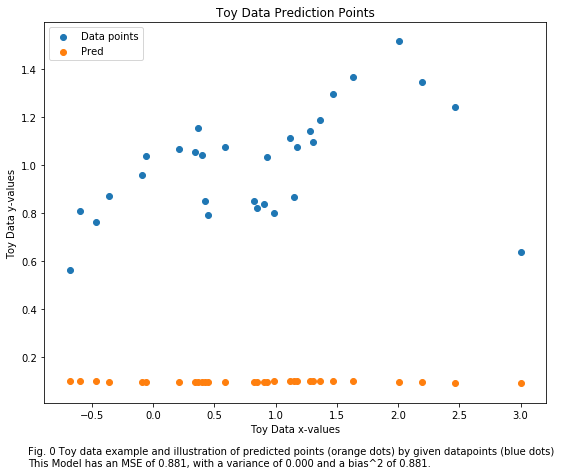

In [7]:
# Check the Bias Variance tradeoff for my model w.r.t. the polynomial degree and the datapoints used.
from sklearn.utils import resample

n = 100
n_boostraps = 50
degree = 5

regresser = lehmannsch_enchantment(function=FrankeFunction, n=n, degree=degree)

X_train = regresser.X_train_raw
y_train = regresser.y_train_raw
X_test = regresser.X_test_raw
y_test = regresser.y_test_raw

testing_designX  = CreateDesignMatrix_X(X_test, y_test, regresser.degree)
## Combine x transformation and model into one operation.
## Not neccesary, but convenient.
#model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(X_train, y_train)
    # mesh it 
    x_, y_ = np.meshgrid(x_, y_)

    # Now let's fit the OLS model to the Train dataset (dataset split in the RegressionMethod Class)
    regresser.Lehmann_OLS_fit(x_, y_, split=True, noise=False)
    regresser.Lehmann_Predictions('OLS', testing_designX, split=True)
    
    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = regresser.lehmann_prediction.ravel()
    if i % 20 == 0: 
        print(str(i) + " and have a shape of " + str(y_pred.shape))

#calculating the MSE, bias and variance of the data
error = np.mean( np.mean((y_test - np.mean(y_pred, axis=1))**2) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)

txt = 'Fig. 0 Toy data example and illustration of predicted points (orange dots) by given datapoints (blue dots)\nThis Model has an MSE of {:.3f}, with a variance of {:.3f} and a bias^2 of {:.3f}.'.format(error, variance, bias)

fig = plt.figure(figsize=(9,7))
plt.scatter(X_test, y_test, label='Data points')
plt.scatter(X_test, np.mean(y_pred, axis=1), label='Pred')
plt.ylabel("Toy Data y-values")
plt.xlabel("Toy Data x-values")
plt.legend(loc="upper left")
plt.title("Toy Data Prediction Points")
plt.savefig(plot_dir + '\\toy_data_regression.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.show()

Polynomial degree: 0
Train Error: 0.8645522393141826
Test  Error: 0.9892526544140149
Polynomial degree: 1
Train Error: 0.8426798842477177
Test  Error: 0.9669673092558376
Polynomial degree: 2
Train Error: 1.1239175530846648
Test  Error: 1.400439429352068
Polynomial degree: 3
Train Error: 1.1163431182199886
Test  Error: 0.8948476200552754
Polynomial degree: 4
Train Error: 1.2638669797540825
Test  Error: 0.7990662002359907
Polynomial degree: 5
Train Error: 0.927232644806796
Test  Error: 2.975915190073475
Polynomial degree: 6
Train Error: 1.2316966516970032
Test  Error: 1.4387045982131406
Polynomial degree: 7
Train Error: 1.1675051620372523
Test  Error: 1.4080623296194907
Polynomial degree: 8
Train Error: 0.8791726613488293
Test  Error: 34.096586627923145
Polynomial degree: 9
Train Error: 1.0016814187547138
Test  Error: 0.8442125528270941
Polynomial degree: 10
Train Error: 6.464885333609043
Test  Error: 261208.03963970544
Polynomial degree: 11
Train Error: 1.761594565704153
Test  Error: 43

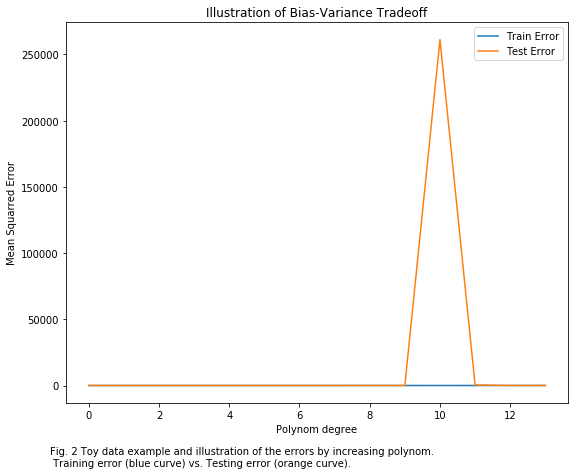

In [15]:
# Let's further analyze the bias variance tradeoff by plotting the train vs test accuracy over model complexity
n = 50
maxdegree = 14 # doing some random shit from 15 onwards

bias_test     = np.zeros(maxdegree)
variance_test = np.zeros(maxdegree)
test_error    = np.zeros(maxdegree)

poly_degree = np.zeros(maxdegree)

bias_train     = np.zeros(maxdegree)
variance_train = np.zeros(maxdegree)
train_error    = np.zeros(maxdegree)

for degree in range(maxdegree):
    # set up OLS and fit on training data
    bias_var = lehmannsch_enchantment(function=FrankeFunction, n=n, degree=degree, testing_size=0.2)
    bias_var.Lehmann_OLS_fit(bias_var.X_train, bias_var.y_train, split=True, noise=True)

    # get the design Matrices for test and train data
    testing_designX  = CreateDesignMatrix_X(bias_var.X_test, bias_var.y_test, degree)
    train_designX = bias_var.designMatrix

    # Get Test Error first
    bias_var.Lehmann_Predictions('OLS', testing_designX, split=True)
    test_error[degree] = np.mean( np.mean((bias_var.y_test.ravel() - bias_var.lehmann_prediction)**2, axis=1, keepdims=True) )
    variance_test[degree] = np.mean( np.var(bias_var.lehmann_prediction, axis=1, keepdims=True) )
    bias_test[degree] = np.mean( (bias_var.y_test.ravel() - np.mean(bias_var.lehmann_prediction, axis=1, keepdims=True))**2 )

    # Now let'd get train error
    bias_var.Lehmann_Predictions('OLS', train_designX, split=True)
    train_error[degree] = np.mean( np.mean((bias_var.y_train.ravel() - bias_var.lehmann_prediction)**2, axis=1, keepdims=True) )
    variance_train[degree] = np.mean( np.var(bias_var.lehmann_prediction, axis=1, keepdims=True) )
    bias_train[degree] = np.mean( (bias_var.y_train.ravel() - np.mean(bias_var.lehmann_prediction, axis=1, keepdims=True))**2 )

    poly_degree[degree] = degree

    print('Polynomial degree:', degree)
    print('Train Error: {}\nTest  Error: {}'.format(train_error[degree], test_error[degree]))
    
txt = 'Fig. 2 Toy data example and illustration of the errors by increasing polynom. \n Training error (blue curve) vs. Testing error (orange curve).'

fig = plt.figure(figsize=(9,7))
plt.plot(poly_degree, train_error, label='Train Error')
plt.plot(poly_degree, test_error, label='Test Error')
plt.ylabel("Mean Squarred Error")
plt.xlabel("Polynom degree")
plt.legend(loc="upper left")
plt.title("Illustration of Bias-Variance Tradeoff")
plt.savefig(plot_dir + '\\bias_variance_tradeoff.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend()
plt.show()

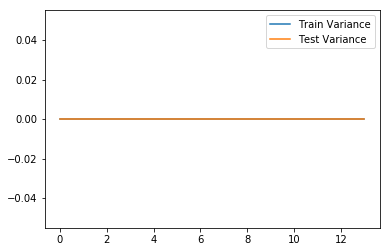

In [18]:
plt.plot(poly_degree, bias_train, label='Train Bias')
plt.plot(poly_degree, bias_test, label='Test Bias')
plt.title("Train Bias vs. Test Bias")
plt.ylabel("Bias Values")
plt.xlabel("Polynom degree")
plt.legend()
plt.show()

In [ ]:
plt.plot(poly_degree, variance_train, label='Train Variance')
plt.plot(poly_degree, variance_test, label='Test Variance')
plt.title("Train Variance vs. Test Variance")
plt.ylabel("Variance Values")
plt.xlabel("Polynom degree")
plt.legend()
plt.show()

As you can see in Fig. 2, the gap between Train and Test Error is increasing when the model complexity increases (polynomial degree increases). This is a classical sign of overfitting. At one dedicated timestep or model complexity step, respectively, the errors start diverging. Since we only operate on toy data this is hard to see in the plot, since there may occur outliers. <br /> 
However, when juggling real data from the world it should look as follows (you have to press the link): [Source: Picture taken from [7], Chapter 2, page 38] <br> 


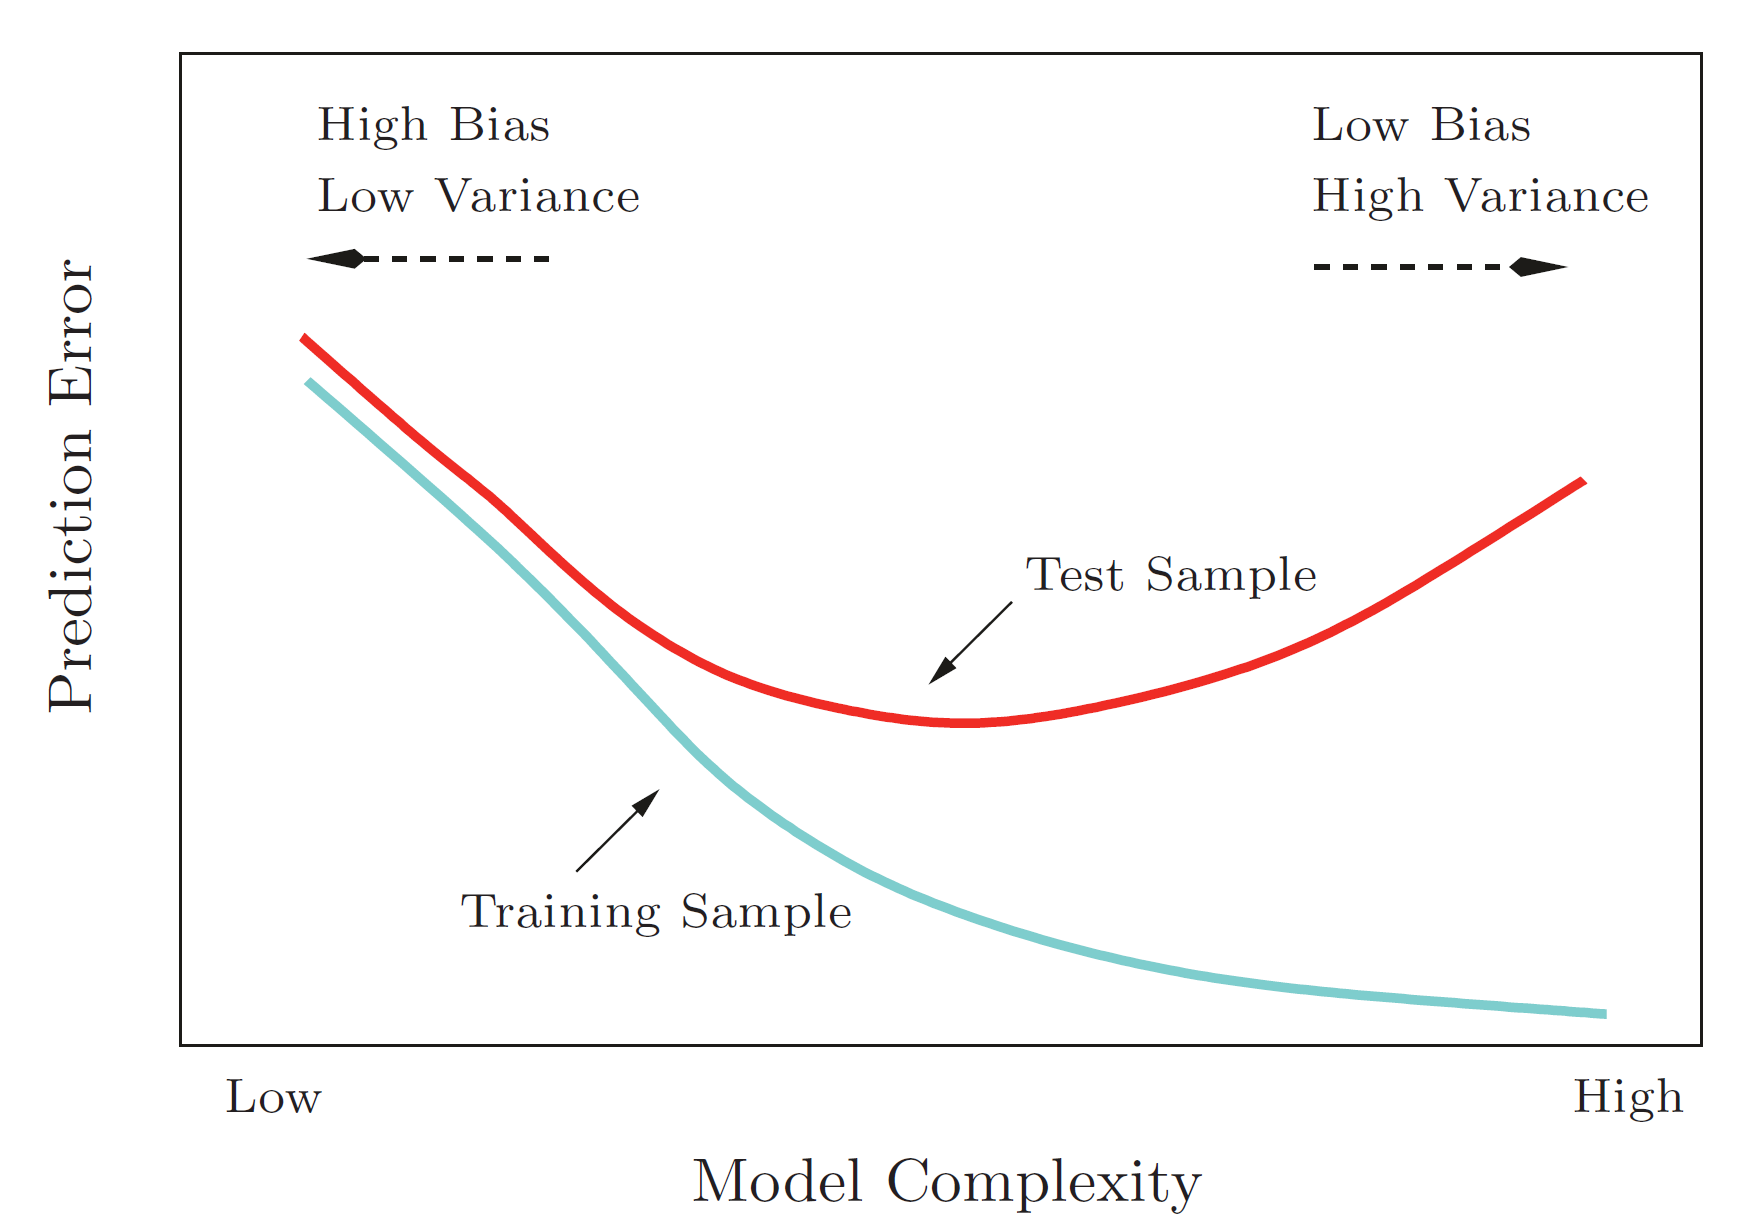

In [19]:
from IPython.display import Image
Image(filename='Test_train_error.PNG')

The image above is clearly indicating the bias-variance tradeoff, or often refered to as overfitting. <br /> 
When the Errors start to diverge, one should stop the training, since it does not generalize for unseen data then. 
This method is called **Early stopping**. <br />
One should use it, when the error start to drift apart to save valuable time and computing power. <br /> 
If that happens, there are several things you can do [2][7]: <br />
a.) change the architecture of your current model (different regularization parameters, different amount of hidden layers and/or neurons within a layer, change the algorithm, instead of Random Forests try to use Neural Nets and vice versa, ...) <br /> 
b.) add more (training) data. The more data, the better the model can learn from it. 



### Ridge and Lasso Regression and the effect of lambda

Ridge and Lasso regression both utilize a regularization parameter $\lambda$. Now, we want to compare the different regression methods with respect to the parameter $\lambda$ along with the polynomial degree (= model complexity) as we know it from the previous plot on the MSE and $R^2$ Score. <br /> 
Note, I implemented only Ridge regression myself, Lasso is taken from the beautiful SKLearn library.

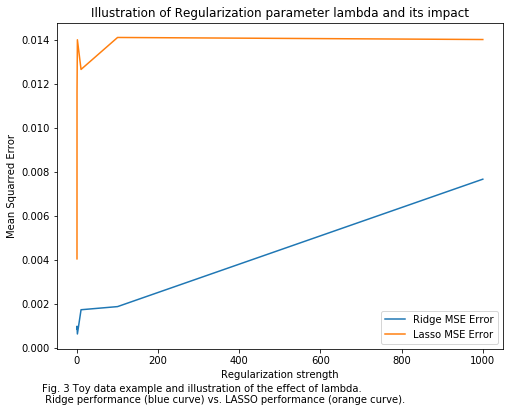

In [23]:
n_data_points = 100
polynom_degree = 5
testing_size = 0.2
splitting = True
noise = False # want to add noise to our fits?
lambda_to_test = [0.01, 0.1, 1, 10, 100, 1000]
maxdegree = 14 # doing some random shit from 15 onwards, so stay with 14

# store the errors to plot them later on
r2  = np.zeros(len(lambda_to_test))
mse = np.zeros(len(lambda_to_test))
r2_lasso  = np.zeros(len(lambda_to_test))
mse_lasso = np.zeros(len(lambda_to_test))

for i,lamda in enumerate(lambda_to_test):
    # Initialize the RegressionMethods class with the Ridge and Lasso Regression included
    scrutinizing_lamda = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, lamda=lamda, degree=polynom_degree, testing_size=testing_size)

    # fit the model, create the design Matrix for Evaluation and evaluate
    scrutinizing_lamda.Lehmann_Ridge_fit(scrutinizing_lamda.lamda, scrutinizing_lamda.X_train, scrutinizing_lamda.y_train, splitting, noise)
    testing_X  = CreateDesignMatrix_X(scrutinizing_lamda.X_test, scrutinizing_lamda.y_test, scrutinizing_lamda.degree)
    scrutinizing_lamda.Lehmann_Predictions('RIDGE', testing_X, split=splitting)
    
    # same shit for LASSO, but this predicts straight away and has the predictions in member variable stored
    scrutinizing_lamda.Sklearn_Lasso(scrutinizing_lamda.lamda, scrutinizing_lamda.X_train, scrutinizing_lamda.y_train, noise=noise)
    
    # Initialize the Score Class for RIDGE for the R2 and MSE error
    scoring = lehmann_approved(scrutinizing_lamda.test_targets, scrutinizing_lamda.lehmann_ridge_pred)
    mse[i] = scoring.MeanSquaredError()
    r2[i]  = scoring.R2_Score()
    
    # LASSO Scores
    sk_lasso = lehmann_approved(scrutinizing_lamda.test_targets, scrutinizing_lamda.sklearn_lasso)
    mse_lasso[i] = sk_lasso.MeanSquaredError()
    r2_lasso[i]  = sk_lasso.R2_Score()
    
#     print("\nSKLearn LASSO, split: True, noise: {},  MSE: {}".format(noise, sk_lasso.MeanSquaredError()))
#     print("SKLearn LASSO, split: True, noise: {},  R2: {}".format(noise, sk_lasso.R2_Score()))
#     print("\nMy Ridge, split: {}, noise: {},  MSE: {}".format(splitting, noise, scoring.MeanSquaredError()))
#     print("My Ridge, split: {}, noise: {},  R2 : {}".format(splitting, noise, scoring.R2_Score()))

# A plot is saying more than 1000 words could describe it - so let's describe what we see then: 
txt = 'Fig. 3 Toy data example and illustration of the effect of lambda. \n Ridge performance (blue curve) vs. LASSO performance (orange curve).'

fig = plt.figure(figsize=(8,6))
plt.plot(lambda_to_test, mse, label='Ridge MSE Error')
plt.plot(lambda_to_test, mse_lasso, label='Lasso MSE Error')
plt.ylabel("Mean Squarred Error")
plt.xlabel("Regularization strength")
plt.legend(loc="upper left")
plt.title("Illustration of Regularization parameter lambda and its impact")
plt.savefig(plot_dir + '\\lambda_effects.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend()
plt.show()

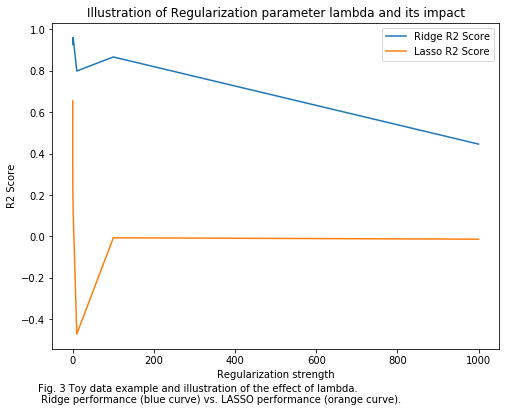

In [24]:
# A plot is saying more than 1000 words could describe it - so let's describe what we see then: 
txt = 'Fig. 3 Toy data example and illustration of the effect of lambda. \n Ridge performance (blue curve) vs. LASSO performance (orange curve).'

fig = plt.figure(figsize=(8,6))
plt.plot(lambda_to_test, r2, label='Ridge R2 Score')
plt.plot(lambda_to_test, r2_lasso, label='Lasso R2 Score')
plt.ylabel("R2 Score")
plt.xlabel("Regularization strength")
plt.legend(loc="upper left")
plt.title("Illustration of Regularization parameter lambda and its impact")
plt.savefig(plot_dir + '\\lambda_effects_r2.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend()
plt.show()

In [ ]:
n_data_points = 100
polynom_degree = 5
testing_size = 0.2
splitting = True
noise = False # want to add noise to our fits?
lambda_to_test = [0.01, 0.1, 1, 10, 100, 1000]
maxdegree = 14 # doing some random shit from 15 onwards, so stay with 14

# store the errors to plot them later on
r2_ridge_train  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
r2_ridge_test   = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_ridge_train = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_ridge_test  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))

r2_lasso_train  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
r2_lasso_test   = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_lasso_train = np.zeros((maxdegree, len(lambda_to_test) + 1 ))
mse_lasso_test  = np.zeros((maxdegree, len(lambda_to_test) + 1 ))

for degree in range(maxdegree):
    for i,lamda in enumerate(lambda_to_test, 1):
        # Initialize the RegressionMethods class with the Ridge and Lasso Regression included
        scrutinizing_lamda = lehmannsch_enchantment(function=FrankeFunction, n=n_data_points, lamda=lamda, degree=polynom_degree, testing_size=testing_size)

        # fit the model, create the design Matrix for Evaluation and evaluate
        scrutinizing_lamda.Lehmann_Ridge_fit(scrutinizing_lamda.lamda, scrutinizing_lamda.X_train, scrutinizing_lamda.y_train, splitting, noise)
        testing_X  = CreateDesignMatrix_X(scrutinizing_lamda.X_test, scrutinizing_lamda.y_test, scrutinizing_lamda.degree)
        scrutinizing_lamda.Lehmann_Predictions('RIDGE', testing_X, split=splitting)
        
        # since train and test share the same member variable for prediction we first have to evaluate the test error
        # Initialize the Score Class for RIDGE for the R2 and MSE error
        scoring = lehmann_approved(scrutinizing_lamda.test_targets, scrutinizing_lamda.lehmann_ridge_pred)
        mse_ridge_test[degree, 0] = degree
        mse_ridge_test[degree, i] = scoring.MeanSquaredError()
        r2_ridge_test[degree, 0] = degree
        r2_ridge_test[degree, i] = scoring.R2_Score()
        
        # Now again do the same for Train data to get this Accuracy
        scrutinizing_lamda.Lehmann_Predictions('RIDGE', scrutinizing_lamda.designMatrix, split=splitting)
        scoring_train = lehmann_approved(scrutinizing_lamda.train_targets, scrutinizing_lamda.lehmann_ridge_pred)
        mse_ridge_train[degree, 0] = degree
        mse_ridge_train[degree, i] = scoring_train.MeanSquaredError()
        r2_ridge_train[degree, 0] = degree
        r2_ridge_train[degree, i] = scoring_train.R2_Score()
    
        # same shit for LASSO, but this predicts straight away and has the predictions in member variable stored
        scrutinizing_lamda.Sklearn_Lasso(scrutinizing_lamda.lamda, scrutinizing_lamda.X_train, scrutinizing_lamda.y_train, evaluate_train_error=False, noise=noise)

        # LASSO Scores
        sk_lasso = lehmann_approved(scrutinizing_lamda.test_targets, scrutinizing_lamda.sklearn_lasso)
        mse_lasso_test[degree, 0] = degree
        mse_lasso_test[degree, i] = sk_lasso.MeanSquaredError()
        r2_lasso_test[degree, 0] = degree
        r2_lasso_test[degree, i] = sk_lasso.R2_Score()
        
        # Again Evaluating the Train Error now
        scrutinizing_lamda.Sklearn_Lasso(scrutinizing_lamda.lamda, scrutinizing_lamda.X_train, scrutinizing_lamda.y_train, evaluate_train_error=True, noise=noise)
        sk_lasso = lehmann_approved(scrutinizing_lamda.train_targets, scrutinizing_lamda.sklearn_lasso)
        mse_lasso_train[degree, 0] = degree
        mse_lasso_train[degree, i] = sk_lasso.MeanSquaredError()
        r2_lasso_train[degree, 0] = degree
        r2_lasso_train[degree, i] = sk_lasso.R2_Score()

# A plot is saying more than 1000 words could describe it - so let's describe what we see then: 
txt = 'Fig. 4 Toy data example and illustration of the effect of lambda. \n Ridge performance (blue curve) vs. LASSO performance (orange curve).'

fig = plt.figure(figsize=(8,6))
plt.plot(lambda_to_test, mse, label='Ridge MSE Error')
plt.plot(lambda_to_test, mse_lasso, label='Lasso MSE Error')
plt.ylabel("Mean Squarred Error")
plt.xlabel("Regularization strength")
plt.legend(loc="upper left")
plt.title("Illustration of Regularization parameter lambda and its impact")
plt.savefig(plot_dir + '\\lambda_effects.png', transparent=True, bbox_inches='tight')
fig.text(0.1, 0, txt)
plt.legend()
plt.show()

## Terrain Data

After introducing and explaining the three regression techniques with "artificial data", we will use proper data from two scenes in Norway. First of all, you can see the topography of these regions in the figures below. <br /> 
This part focuses on the parametrization of the terrain data. 
Comparing the models with each other will result in the best regression method for this dataset in Norway.

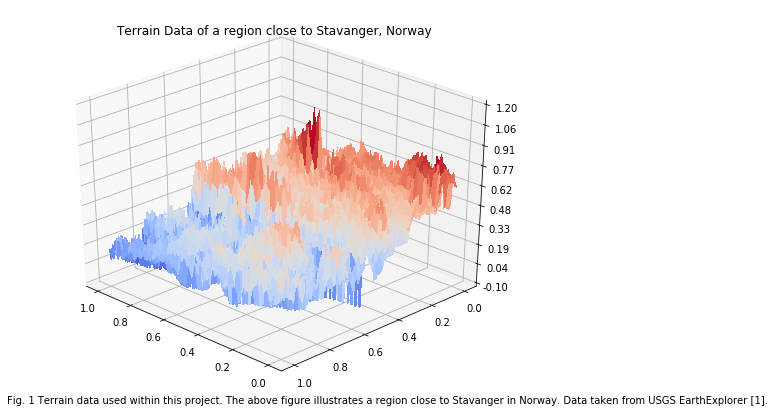

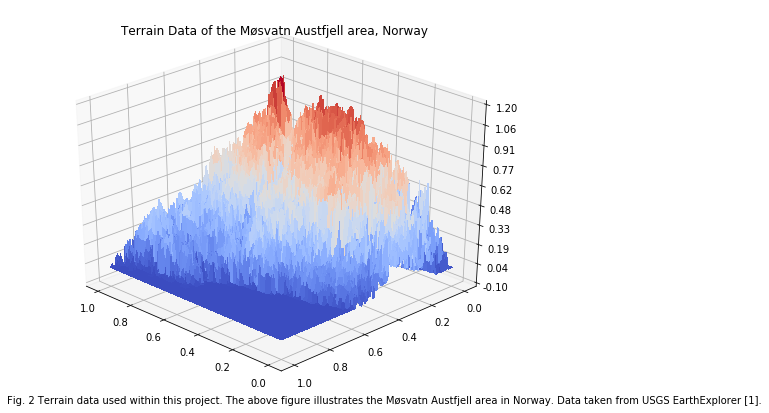

In [19]:
def plot_terrain(file_number=1):
    # caption the plot
    if file_number == 2:
        area_name = 'the Møsvatn Austfjell area'
    else:
        area_name = 'a region close to Stavanger'
    txt = 'Fig. ' + str(file_number) + ' Terrain data used within this project. The above figure illustrates ' + area_name + ' in Norway. Data taken from USGS EarthExplorer [1].'
    
    # read the file and generate the data
    fileName = os.path.join(os.getcwd(), 'SRTM_data_Norway_' + str(file_number) + '.tif')
    image = Image.open(fileName, mode='r')
    image.mode = 'I'
    #print(image.size) # width, height
    x = np.linspace(0, 1, image.size[0])
    y = np.linspace(0, 1, image.size[1])
    X,Y = np.meshgrid(x,y)
    Z = np.array(image)
    Z = Z - np.min(Z)
    Z = Z / np.max(Z)
    
    # plot the figure
    fig = plt.figure(figsize=(9,7))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.20)
    ax.set_title("Terrain Data of " + area_name + ", Norway")
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(30, 45+90)
    fig.text(.1,.1,txt)
    #plt.savefig(plot_dir + '\\terrain_' + area_name + '.png', transparent=True, bbox_inches='tight')
    plt.show()
plot_terrain()
plot_terrain(2)

In the figures above we can see the 3D plot of our areas in Norway. 
Since we want to perform some Regression algorithms on it we need to read the data accordingly in $x, y, z$.

In [4]:
def terrain_to_x_y_z(self, filenumber=1):
    #setting up data points for real data
    z = imread('SRTM_data_Norway_' + str(filenumber) + '.tif')
    x = np.linspace(0, 1, len(z[1])).reshape(len(z[1]),1)
    y = np.linspace(0, 1, len(z)).reshape(len(z),1) # normalized data from 0 to 1
    terrain_x, terrain_y = np.meshgrid(x,y)
    terrain_z = z/np.max(z) # normalize
    return terrain_x, terrain_y, terrain_z

In [5]:
mosvatn_x, mosvatn_y, mosvatn_z = terrain_to_x_y_z(2)
print(mosvatn_x.shape, mosvatn_y.shape, mosvatn_z.shape)
# that will be the shape of our matrix and is the image size (height, width)

(3601, 1801) (3601, 1801) (3601, 1801)


As far as I understood we have the $x, y$ coordinates and we should predict its height based on these coordinates. 
Then I would say lets generate the dataset accordingly: we do have 2 features (*x, y*) and the target output *z*.
Thus we have to merge *x* and *y* to get our real dataset $\boldsymbol{X}$ as well as our targets $\boldsymbol{y}$, which are basically comprise the *z* space of our data. <br /> 
Here it is important to mention that we need to shuffle the data within our dataset. 
Due to the mesh we set up during loading in the real data, we have a spatial correlation in the dataset. This is bad, since the model can also just learn that the beginning is pretty flat and towards the end there is the increase in altitude, speaking of the terrain topology data. <br /> 
Hence, if we randomly shuffle the data it is more likely that the samples in the training and test dataset each have points of the highest and or lowest point in our terrain data, respectively. Thus, the model is not biased since it had seen both data during the training.


In [20]:
print(mosvatn_z[:4, :]) # first 4 height 'rows' and entire width

[[0.62252011 0.62466488 0.62680965 ... 0.49919571 0.49436997 0.49436997]
 [0.62627346 0.62788204 0.62949062 ... 0.50455764 0.49758713 0.49436997]
 [0.62841823 0.62895442 0.630563   ... 0.50670241 0.50080429 0.49544236]
 [0.630563   0.630563   0.6310992  ... 0.50670241 0.50187668 0.49705094]]


In [47]:
from RegressionMethods import CreateDesignMatrix_X
poly_degree = 5

X = np.vstack([mosvatn_x.ravel(), mosvatn_y.ravel()]).T
y = np.reshape(mosvatn_z, X.shape[0])

## for our split we will have to enable the shuffling, since it could just learn the position by time.
## to get random samples from the entire space and not spatial correlated once we just enable the shuffling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# bring both training data to same shape 
y_train = np.vstack([y_train, y_train]).T
y_test =  np.vstack([y_test, y_test]).T
print(X_train.shape, y_train.shape)

(5188320, 2) (5188320, 2)


In [48]:
## Now create the design Matrix - notice that X has to columns so we need to double y as well
X = CreateDesignMatrix_X(X_train.ravel(), y_train.ravel(), poly_degree)
print(X.shape)
dX_test = CreateDesignMatrix_X(X_test.ravel(), y_test.ravel(), poly_degree)
print(dX_test.shape)

(10376640, 21)
(2594162, 21)


In [49]:
## now let's fit it
noisy_2D  = np.vstack([np.random.normal(0, 0.4, X_train.shape[0]).ravel(), np.random.normal(0, 0.4, X_train.shape[0]).ravel()]).T 
z_noisy = FrankeFunction(X_train, y_train) + (5 * noisy_2D)

try:
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(z_noisy.reshape(-1,1))
    # for Ridge
    #beta = np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + self.lambda_ * np.eye(X.shape[1])), np.dot(np.transpose(X),y))
except: 
    U,S,Vt = np.linalg.svd(X, full_matrices=True)
    S_inverse = np.zeros(shape=X.shape)
    S_inverse[:S.shape[0], :S.shape[0]] = np.diag(1.0 / S)
    beta = np.dot(Vt.T, np.dot(S_inverse.T, np.dot(U.T, y)))
    
prediction = X.dot(beta)
prediction_test = dX_test.dot(beta)
print(prediction.shape, prediction_test.shape)

(10376640, 1) (2594162, 1)


In [50]:
from sklearn import linear_model, metrics
# generate the proper targets
real_target =  FrankeFunction(X_train, y_train)
real_test = FrankeFunction(X_test, y_test)

# get MSE Score 
train_error = metrics.mean_squared_error(real_target.ravel(), prediction)
test_error = metrics.mean_squared_error(real_test.ravel(), prediction_test)
print(train_error)
print(test_error)

0.001447526803833779
0.0014498977927185311


## 4.) Analysis

As shown in the previous section (**Code and Implementation**) we see that there have been some people who are at risk to not pay their debt in time. Thus, you can already send these people some help and offer some other duties they have to follow, etc. Here we only took a look at the data we have at hand (25 features) and neglect all the other (key) factors that could help us getting more insights about the persons' circumstances. <br />
However, we compared three different kind of Machine Learning algorithms with each other and benchmarked each single one of them. <br />
The overall plot tells us that Random Forests achieved better results than kNN or SVM, respectively. 
Since I have only limited computing power as well as time, I just used random variables for the Hyperparamter Search for all three Algorithms. <br />
Keep in mind that it might be possible that SVM outperforms Random Forest with a different kind of Parameter Setting, but for our case we can definitely say that the Random Forest had the best accuracy with the testes Paramters. <br />
On big problem with the dataset was is that it is unbalanced and we need to have balanced classes for each of the classification outputs otherwise our predictor will be biased (for further read on the impact on unbalanced datasets please check out [this thread](https://www.researchgate.net/post/Effect_of_imbalanced_data_on_machine_learning)) <br />
For better Accuracy of the Credit Card dataset one could scrape the web to see where they made the transactions and derive valuable insights based on that. Basically adding more data and more features to our training and test set to have a better expressiveness of our algorithm and our predictions. 

*Dive into the Analysis and plots from the previous section --> Correlation of single features with each other...* 

## 5.) Conclusions

We see that this dataset gives us already some really interesting facts and we can derive some nice predictions based on that. 
Now that we predicted some potential 'threats' in our customer base we can just directly approach these guys and try to help them out with offering them certain duties or suggesting different options for the credit card. 
Other ways to improve the accuracy of our system would be to either 
    1.) generate more data with more features
    2.) apply state of the art artificial neural networks (deep learning) algorithms such as DenseNet, etc.
If we go with 1.) we would need more time since every payment will be recorded and we would get more data based upon time. Another way to artifically generate more data would be by intelligently use other methods to renrich the feature space of our data. So instead of having 25 features we could augment it to 30 with additional features such as *usual shopping district*, *usual time of payments*, etc. 

The 2.) method suggests a modern approach of classification by modelling as good as possible to our training set and have predictions which usually outperform SVMs or Linear Regression methods for more complex datasets.

## References

[1] EarthExplorer website: https://earthexplorer.usgs.gov/, Used Dataset: Norway, last visited 05.09.2019 <br />
[2] Bishop, C.M. et al. (2011). *Pattern Recognition and Machine Learning*. Cambridge: Springer. <br />
[3] Duda, R. O. et al. (2007). *Pattern Classification*. San Jose: Wiley. <br />
[4] Murphy, K. P. et al. (2007). *Machine Learning: A probabilistic Perspective*. Camebridge: MIT Press. <br />
[5] Knoll, A. (2019). *Cognitive Systems*. Lecture hold at Technical University Munich (TUM), [Source](https://github.com/lenlehm/Regression-and-Resampling/blob/master/E02-Machine_Learning.pdf) included in Github Repository <br />
[6] Hjorth-Jensen, M. (2019). *Regression*. Lecture hold at University of Oslo (UiO), [Source](https://compphysics.github.io/MachineLearning/doc/web/course.html) <br />
[7] Hastie, T. et al. (2009). *The Elements of Statistical Learning*. Camebridge: Springer <br />